<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.555369  87.808420  65.904061  ...  235.134951  235.255477 -0.120527
      1.0    34.422192  81.004175  40.647732  ...  166.243116  166.072746  0.170370
      2.0    81.324892  87.050180  50.076621  ...  228.597891  228.440605  0.157285
      3.0    50.475749  56.265269  68.926674  ...  185.279474  185.671404 -0.391930
      4.0    23.596257  91.826638  60.278796  ...  186.616079  185.694228  0.921851
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  71.165451  88.330535  72.565990  ...  241.175238  242.074437 -0.899199
      246.0  80.815637  50.034602  97.446109  ...  237.294127  238.155754 -0.861627
      247.0  30.254620  75.687974  45.996855  ...  162.868054  161.990418  0.877636
      248.0  47.540176  79.952080  91.693099  ...  229.288176  229.178607  0.109569
      249.0  74.782903  78.907218  85.540689  ...  249.629739  249.196587  0.433152

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.555369  87.808420  65.904061  ...  235.134951  235.255477 -0.120527
      1.0    34.422192  81.004175  40.647732  ...  166.243116  166.072746  0.170370
      2.0    81.324892  87.050180  50.076621  ...  228.597891  228.440605  0.157285
      3.0    50.475749  56.265269  68.926674  ...  185.279474  185.671404 -0.391930
      4.0    23.596257  91.826638  60.278796  ...  186.616079  185.694228  0.921851
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  71.165451  88.330535  72.565990  ...  241.175238  242.074437 -0.899199
      246.0  80.815637  50.034602  97.446109  ...  237.294127  238.155754 -0.861627
      247.0  30.254620  75.687974  45.996855  ...  162.868054  161.990418  0.877636
      248.0  47.540176  79.952080  91.693099  ...  229.288176  229.178607  0.109569
      249.0  74.782903  78.907218  85.540689  ...  249.629739  249.196587  0.433152

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.555369  87.808420  65.904061  ...  235.134951  235.255477 -0.120527
      1.0    34.422192  81.004175  40.647732  ...  166.243116  166.072746  0.170370
      2.0    81.324892  87.050180  50.076621  ...  228.597891  228.440605  0.157285
      3.0    50.475749  56.265269  68.926674  ...  185.279474  185.671404 -0.391930
      4.0    23.596257  91.826638  60.278796  ...  186.616079  185.694228  0.921851
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  71.165451  88.330535  72.565990  ...  241.175238  242.074437 -0.899199
      246.0  80.815637  50.034602  97.446109  ...  237.294127  238.155754 -0.861627
      247.0  30.254620  75.687974  45.996855  ...  162.868054  161.990418  0.877636
      248.0  47.540176  79.952080  91.693099  ...  229.288176  229.178607  0.109569
      249.0  74.782903  78.907218  85.540689  ...  249.629739  249.196587  0.433152

[250000 rows x 7 columns]

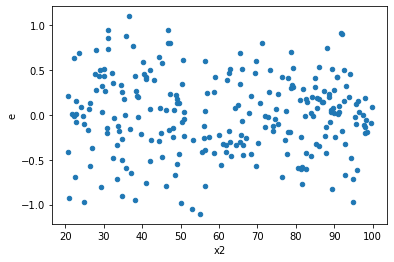

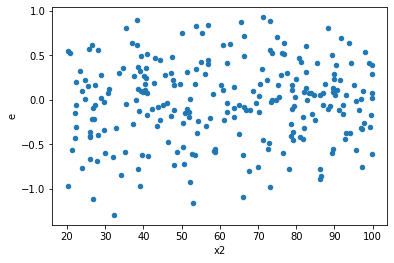

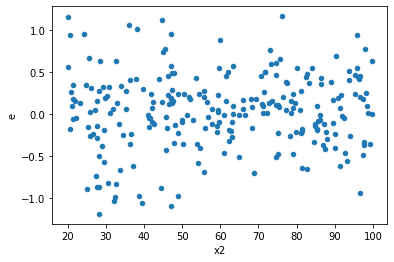

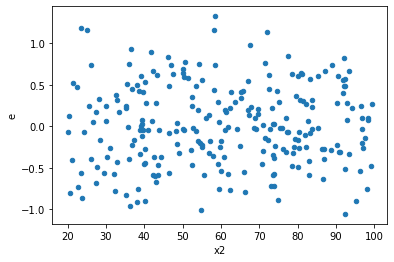

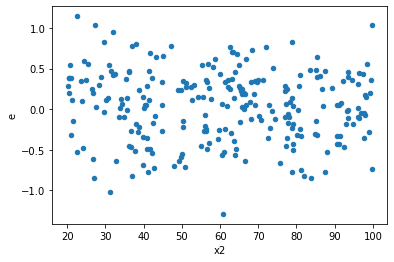

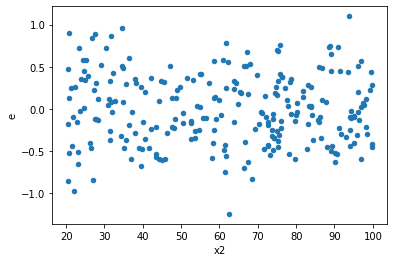

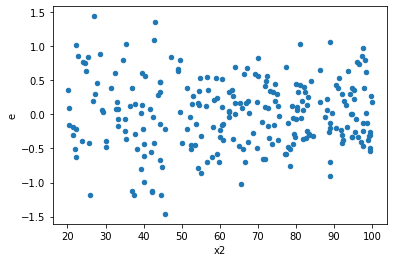

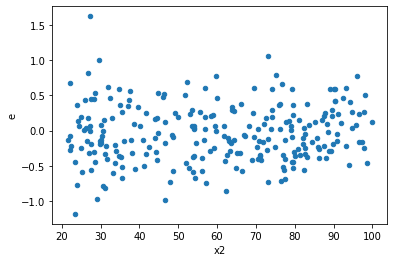

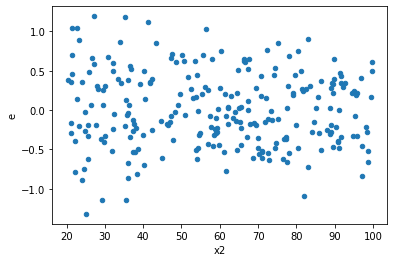

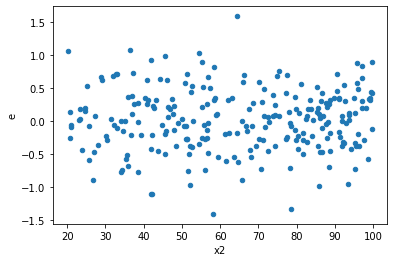

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,121.0,123.0,22.240883622180633,27.05532338641492,0.18380895555521184,0.2199619787513408,1.1966880399647852,0.3223441335428703,0.8388279332285649,0.16117206677143514,Reject001=1 : Homoscedasticity
4.0,119.0,125.0,19.007785904381272,26.647385555357253,0.15972929331412833,0.21317908444285802,1.3346273561957966,0.1116086856909162,0.9441956571545419,0.0558043428454581,Reject001=1 : Homoscedasticity
6.0,118.0,126.0,29.355679743489198,32.39690226806706,0.24877694697872202,0.25711827196878617,1.033529332566243,0.8542681004242758,0.5728659497878621,0.4271340502121379,Reject001=1 : Homoscedasticity
7.0,128.0,116.0,20.422937045916445,19.44647680295186,0.15955419567122223,0.1676420414047574,1.0506902729791012,0.787858144627898,0.606070927686051,0.393929072313949,Reject001=1 : Homoscedasticity
8.0,134.0,110.0,22.34206051483392,31.976716064657403,0.1667317948868203,0.29069741876961275,1.7435032050542125,0.002726893860100832,0.9986365530699496,0.001363446930050416,Reject001=0 : Heteroscedasticity
9.0,117.0,127.0,21.98155949767417,31.66074815548055,0.18787657690319803,0.249297229570713,1.3269202243298348,0.1186331641865579,0.940683417906721,0.05931658209327895,Reject001=1 : Homoscedasticity
10.0,116.0,128.0,22.290795473231046,26.80369857456002,0.19216202994164694,0.20940389511375015,1.0897256610857982,0.6339088828041217,0.6830455585979391,0.31695444140206086,Reject001=1 : Homoscedasticity
12.0,137.0,107.0,18.919754784712364,19.53892391304344,0.1381003998884114,0.18260676554246205,1.3222754292530137,0.13120498060085306,0.9343975096995735,0.06560249030042653,Reject001=1 : Homoscedasticity
15.0,109.0,135.0,19.414707834262835,32.94639516041025,0.17811658563543886,0.24404737155859443,1.3701552311254146,0.08214644787542436,0.9589267760622878,0.04107322393771218,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,125.0,29.750576149226564,17.705736159541864,0.2500048415901392,0.14164588927633492,0.5665725846563836,0.001927742571667694,Reject001=0 : Heteroscedasticity
1.0,121.0,123.0,22.240883622180633,27.05532338641492,0.18380895555521184,0.2199619787513408,1.1966880399647852,0.3223441335428703,Reject001=1 : Homoscedasticity
2.0,127.0,117.0,30.57156237248495,16.49258733809455,0.24072096356287365,0.14096228494097904,0.585583751637656,0.0032535278866744816,Reject001=0 : Heteroscedasticity
3.0,118.0,126.0,27.281403750203236,27.46415582721579,0.23119833686612912,0.21796949069218882,0.9427813956049338,0.7471119502683647,Reject001=1 : Homoscedasticity
4.0,119.0,125.0,19.007785904381272,26.647385555357253,0.15972929331412833,0.21317908444285802,1.3346273561957966,0.1116086856909162,Reject001=1 : Homoscedasticity
5.0,99.0,145.0,17.584898080324756,23.138873263047202,0.1776252331345935,0.15957843629687726,0.8983995881708908,0.5712536272224067,Reject001=1 : Homoscedasticity
6.0,118.0,126.0,29.355679743489198,32.39690226806706,0.24877694697872202,0.25711827196878617,1.033529332566243,0.8542681004242758,Reject001=1 : Homoscedasticity
7.0,128.0,116.0,20.422937045916445,19.44647680295186,0.15955419567122223,0.1676420414047574,1.0506902729791012,0.787858144627898,Reject001=1 : Homoscedasticity
8.0,134.0,110.0,22.34206051483392,31.976716064657403,0.1667317948868203,0.29069741876961275,1.7435032050542125,0.002726893860100832,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      935
Reject001=0 : Heteroscedasticity     65
Name: Result_test, dtype: int64